# JupyterLite で学ぶ pandas 入門チュートリアル

このノートブックは、**JupyterLite（ブラウザだけで動く Jupyter 環境）** 上で、
データ分析ライブラリ **pandas** の基本的な使い方を学ぶためのチュートリアルです。

- Series / DataFrame の基本
- データの選択・フィルタリング
- 集約（groupby）
- 欠損値処理
- 結合（merge, concat）
- 時系列データの扱い

などを順に体験できる構成になっています。

## 0. 環境準備（JupyterLite 用）

このノートブックは **JupyterLite（Pyodide）** 上での利用を想定しています。

まず、必要なライブラリをインストール（またはロード）します。
環境によってはすでにインストール済みの場合もあるため、
エラーが出なければそのまま進んでください。

In [1]:
# 必要に応じて piplite を使ってパッケージをロード/インストールします。
try:
    import piplite
    await piplite.install(["numpy", "pandas", "matplotlib", "seaborn", "japanize-matplotlib-jlite"])
except ImportError:
    # piplite が無い環境（ローカル Jupyter など）の場合はそのまま続行します
    pass


### 0.1 インポートと日本語表示設定

pandas に加え、数値計算や可視化に必要なライブラリをインポートします。
日本語のグラフ表示のために `japanize_matplotlib_jlite` を最後に読み込みます。

In [2]:
import matplotlib.pyplot as plt  # グラフ作成
import seaborn as sns             # 見た目の良いグラフ
import numpy as np                # 数値計算
import pandas as pd               # データ分析の主役

import japanize_matplotlib_jlite  # 日本語表示用（必ず最後に）

# 表示設定（お好みで）
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)


## 1. Series と DataFrame の基本

pandas には主に 2 つの重要なデータ構造があります。

- **Series**: 1 次元のラベル付き配列
- **DataFrame**: 行と列を持つ 2 次元の表形式データ

ここではそれぞれの基本的な扱い方を確認します。

### 1.1 Series の作成とインデックス

In [3]:
# リストから Series を作成
s = pd.Series([10, 20, 30, 40], index=["a", "b", "c", "d"])
s

a    10
b    20
c    30
d    40
dtype: int64

### 1.2 DataFrame の作成

辞書型（dict）や 2 次元配列から DataFrame を作成できます。

In [4]:
data = {
    "name": ["Alice", "Bob", "Charlie", "David"],
    "age": [23, 35, 31, 19],
    "score": [85, 92, 78, 88]
}

df = pd.DataFrame(data)
df

,name,age,score
0,Alice,23,85
1,Bob,35,92
2,Charlie,31,78
3,David,19,88


### 1章 練習問題

1. 好きな果物の名前と値段（円）を 3 件以上含む Series を作成し、インデックスには果物の名前を使いなさい。
2. 自分や家族・友人など 3〜5 人分の「名前」「年齢」「身長」の列を持つ DataFrame を作りなさい。
3. 作成した DataFrame について、`dtypes` 属性を確認し、各列のデータ型を説明しなさい。

## 2. データの読み書き（CSV を中心に）

JupyterLite では、ブラウザから CSV ファイルをアップロードし、`pd.read_csv` で読み込むことができます。
ここでは、簡単のため **一度 DataFrame を作ってから CSV に書き出し、再度読み込む** 流れを体験します。

### 2.1 DataFrame の CSV 書き出しと読み込み

In [6]:
# 例として、先ほどの df を CSV に書き出してから、再度読み込んでみます。

csv_text = df.to_csv(index=False)
print("CSV の中身（テキスト）:")
print(csv_text)

# StringIO を使って文字列から CSV を読み込む
from io import StringIO

df_from_csv = pd.read_csv(StringIO(csv_text))
print("\nCSV から読み込んだ DataFrame:")
print(df_from_csv)


CSV の中身（テキスト）:
name,age,score
Alice,23,85
Bob,35,92
Charlie,31,78
David,19,88


CSV から読み込んだ DataFrame:
      name  age  score
0    Alice   23     85
1      Bob   35     92
2  Charlie   31     78
3    David   19     88


### 2章 練習問題

1. 自分で簡単な DataFrame を作成し、`to_csv` を使って CSV 文字列に変換しなさい。
2. 1 で作成した CSV 文字列を `pd.read_csv` + `StringIO` で読み込み、元の DataFrame と同じかどうか確認しなさい。
3. 実際の授業や研究で使うデータファイルを JupyterLite にアップロードして利用する場合、どのような手順になるかを文章で説明しなさい。

## 3. データの選択・フィルタリング

pandas では、行や列をさまざまな方法で選択できます。

- 列名での選択: `df["col"]` / `df[["col1", "col2"]]`
- 行ラベル・列ラベル指定: `loc`
- 行番号・列番号指定: `iloc`
- 条件によるフィルタリング: `df[df["col"] > 値]`

### 3.1 列の選択

In [7]:
# 1 列だけ
df["age"]

0    23
1    35
2    31
3    19
Name: age, dtype: int64

In [8]:
# 複数列
df[["name", "score"]]

,name,score
0,Alice,85
1,Bob,92
2,Charlie,78
3,David,88


### 3.2 loc と iloc による行・列の選択

In [9]:
# 行ラベルと列名での選択（ラベルベース）
df.loc[0, "name"]  # 0 行目の name 列

'Alice'

In [10]:
# 行番号と列番号での選択（位置ベース）
df.iloc[1, 2]  # 1 行目、2 列目

np.int64(92)

### 3.3 条件によるフィルタリング

In [11]:
# score が 85 以上の行だけを抽出
df[df["score"] >= 85]

,name,age,score
0,Alice,23,85
1,Bob,35,92
3,David,19,88


### 3章 練習問題

1. `age` が 30 以上の行だけを抽出し、新しい DataFrame として表示しなさい。
2. `score` が 80 未満の人の `name` と `score` だけを表示しなさい。
3. `loc` と `iloc` の違いを、自分の言葉で 2〜3 行で説明しなさい。

## 4. 集約・グルーピング（groupby）

カテゴリごとの平均・合計などを求めるには、`groupby` を利用します。

ここでは、簡単な売上データを想定して、
「店舗ごとの売上合計」や「カテゴリごとの平均価格」などを計算してみます。

### 4.1 ダミーデータの作成

In [12]:
sales_df = pd.DataFrame({
    "shop": ["A", "A", "B", "B", "C", "C", "A", "B"],
    "category": ["飲料", "食品", "飲料", "雑貨", "食品", "雑貨", "飲料", "食品"],
    "amount": [120, 300, 200, 150, 250, 400, 180, 220]
})

sales_df

,shop,category,amount
0,A,飲料,120
1,A,食品,300
2,B,飲料,200
3,B,雑貨,150
4,C,食品,250
5,C,雑貨,400
6,A,飲料,180
7,B,食品,220


### 4.2 店舗ごとの売上合計

In [13]:
sales_df.groupby("shop")["amount"].sum()

shop
A    600
B    570
C    650
Name: amount, dtype: int64

### 4.3 店舗 × カテゴリごとの平均売上

In [14]:
sales_df.groupby(["shop", "category"])["amount"].mean()

shop  category
A     食品          300.0
      飲料          150.0
B     雑貨          150.0
      食品          220.0
      飲料          200.0
C     雑貨          400.0
      食品          250.0
Name: amount, dtype: float64

### 4章 練習問題

1. `category` ごとの売上合計を求めなさい。
2. `shop` ごとの売上平均と標準偏差を同時に計算しなさい（`agg` を使う）。
3. groupby の結果を `reset_index()` して、ふつうの DataFrame に戻してみなさい。

## 5. 欠損値（NaN）の扱い

現実のデータには、しばしば欠損値（NaN）が含まれます。
pandas では、`isna` / `fillna` / `dropna` などで欠損値を扱います。

### 5.1 欠損値を含むデータの例

In [16]:
nan_df = pd.DataFrame({
    "name": ["Alice", "Bob", "Charlie", "David"],
    "age": [23, np.nan, 31, 19],
    "score": [85, 92, np.nan, 88]
})

nan_df

,name,age,score
0,Alice,23.0,85.0
1,Bob,NaN,92.0
2,Charlie,31.0,NaN
3,David,19.0,88.0


### 5.2 欠損の確認

In [17]:
nan_df.isna()

,name,age,score
0,False,False,False
1,False,True,False
2,False,False,True
3,False,False,False


In [18]:
nan_df.isna().sum()  # 列ごとの欠損数

name     0
age      1
score    1
dtype: int64

### 5.3 欠損の除去・補完

In [19]:
# 欠損値を含む行を削除
drop_df = nan_df.dropna()
drop_df

,name,age,score
0,Alice,23.0,85.0
3,David,19.0,88.0


In [20]:
# 欠損値を平均値で補完（score 列）
fill_df = nan_df.copy()
fill_df["score"] = fill_df["score"].fillna(fill_df["score"].mean())
fill_df

,name,age,score
0,Alice,23.0,85.000000
1,Bob,NaN,92.000000
2,Charlie,31.0,88.333333
3,David,19.0,88.000000


### 5章 練習問題

1. `nan_df` の `age` 列の欠損値を、年齢の平均で補完した新しい DataFrame を作りなさい。
2. `score` 列の欠損値を 0 で補完した場合と、平均値で補完した場合の違いについて、自分の言葉で説明しなさい。
3. 欠損値が多い列をそのまま使うことのリスクや、削除する場合のリスクについて、簡単にコメントしなさい。

## 6. 並べ替えと基本統計量

pandas では、`sort_values` や `describe` などを使って、
データの概要や分布を簡単に調べることができます。

### 6.1 並べ替え（sort_values）

In [21]:
# score の降順で並べ替え
df.sort_values("score", ascending=False)

,name,age,score
1,Bob,35,92
3,David,19,88
0,Alice,23,85
2,Charlie,31,78


### 6.2 基本統計量（describe）

In [22]:
df.describe()

,age,score
count,4.000000,4.000000
mean,27.000000,85.750000
std,7.302967,5.909033
min,19.000000,78.000000
25%,22.000000,83.250000
50%,27.000000,86.500000
75%,32.000000,89.000000
max,35.000000,92.000000


### 6.3 value_counts による頻度集計

In [23]:
sales_df["category"].value_counts()

category
飲料    3
食品    3
雑貨    2
Name: count, dtype: int64

### 6章 練習問題

1. `df` を `age` の昇順に並べ替えた DataFrame を表示しなさい。
2. `df` の `score` について、平均・中央値・標準偏差を個別に計算しなさい。
3. `sales_df` の `shop` 列について、店舗ごとの出現回数（何件の取引があるか）を `value_counts` で求めなさい。

## 7. データの結合（merge と concat）

複数の DataFrame を組み合わせるには、
- キー（ID）に基づく結合：`merge`
- 行方向・列方向への単純な連結：`concat`
を使います。

### 7.1 merge の例（顧客マスタと売上データ）

In [24]:
customers = pd.DataFrame({
    "customer_id": [1, 2, 3],
    "name": ["Taro", "Hanako", "Ken"],
    "pref": ["東京", "愛知", "大阪"]
})

orders = pd.DataFrame({
    "order_id": [100, 101, 102, 103],
    "customer_id": [1, 2, 1, 3],
    "amount": [3000, 1500, 2000, 4000]
})

print("顧客マスタ:")
print(customers)
print("\n注文データ:")
print(orders)

merged = pd.merge(orders, customers, on="customer_id", how="left")
print("\n結合結果:")
print(merged)

顧客マスタ:
   customer_id    name pref
0            1    Taro   東京
1            2  Hanako   愛知
2            3     Ken   大阪

注文データ:
   order_id  customer_id  amount
0       100            1    3000
1       101            2    1500
2       102            1    2000
3       103            3    4000

結合結果:
   order_id  customer_id  amount    name pref
0       100            1    3000    Taro   東京
1       101            2    1500  Hanako   愛知
2       102            1    2000    Taro   東京
3       103            3    4000     Ken   大阪


### 7.2 concat の例（行方向の連結）

In [25]:
df1 = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
df2 = pd.DataFrame({"A": [5, 6], "B": [7, 8]})

pd.concat([df1, df2], ignore_index=True)

,A,B
0,1,3
1,2,4
2,5,7
3,6,8


### 7章 練習問題

1. `merged` DataFrame から、愛知（pref が「愛知」）に住む顧客の注文だけを抽出しなさい。
2. `customers` に新たな顧客を 1 件追加した DataFrame を作り、`concat` で元の `customers` と連結しなさい。
3. `merge` と `concat` の違いを、具体例とともに説明しなさい。

## 8. 時系列データの扱い

pandas では、日付や時間をインデックスにした時系列データを扱うことが得意です。
ここでは、簡単な日次データを作成し、リサンプリング（`resample`）で週次や月次に集約してみます。

### 8.1 日次データの作成

In [26]:
date_index = pd.date_range(start="2023-01-01", periods=60, freq="D")
np.random.seed(0)
value = np.random.randint(50, 150, size=60)

ts_df = pd.DataFrame({"value": value}, index=date_index)
ts_df.head()


,value
2023-01-01,94
2023-01-02,97
2023-01-03,114
2023-01-04,117
2023-01-05,117


### 8.2 日次データの可視化

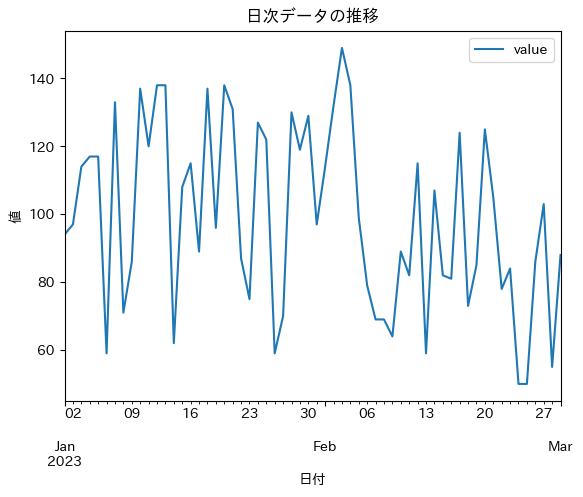

In [27]:
ts_df.plot()
plt.title("日次データの推移")
plt.xlabel("日付")
plt.ylabel("値")
plt.show()


### 8.3 週次・月次へのリサンプリング

In [28]:
# 週次（W）の合計
weekly = ts_df.resample("W").sum()
print("週次合計:")
print(weekly)

# 月次（M）の平均
monthly = ts_df.resample("M").mean()
print("\n月次平均:")
print(monthly)

週次合計:
            value
2023-01-01     94
2023-01-08    708
2023-01-15    789
2023-01-22    793
2023-01-29    702
2023-02-05    858
2023-02-12    567
2023-02-19    611
2023-02-26    578
2023-03-05    246

月次平均:
                 value
2023-01-31  106.838710
2023-02-28   90.928571
2023-03-31   88.000000


/tmp/ipykernel_5881/333414297.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts_df.resample("M").mean()


### 8章 練習問題

1. 日次データ `ts_df` から、`resample("W").mean()` を使って週次平均を計算しなさい。
2. 週次平均と週次合計の違いを、どのような場面で使い分けるべきかコメントしなさい。
3. 自分の生活ログ（例：歩数、勉強時間など）を時系列データとして記録するとしたら、どのようなカラム構成と頻度（日次／週次など）にするか考えをまとめなさい。

## 9. 総合ミニ演習

最後に、これまで学んだ内容を組み合わせて、
簡単な分析ストーリーを自分で作ってみましょう。

### 演習例 1：架空のアンケートデータ分析

1. 次のような列を持つ DataFrame を自分で作成しなさい（少なくとも 20 行以上）。
   - `id`: 回答者ID
   - `age`: 年齢
   - `gender`: 性別（"M" / "F" など）
   - `hours_sns`: 1 日あたりの SNS 利用時間（時間）
   - `satisfaction`: 満足度（1〜5 の整数）
2. 年齢階級（例：10代・20代・30代…）ごとに満足度の平均を計算しなさい。
3. 性別ごとの SNS 利用時間の平均と標準偏差を計算しなさい。
4. `hours_sns` と `satisfaction` の関係を散布図で可視化し、簡単なコメントを付けなさい。

### 演習例 2：売上データの簡易ダッシュボード

1. 日付・店舗・カテゴリ・売上金額の列を持つ DataFrame を作成しなさい（30 日分程度）。
2. 店舗ごとの売上合計・カテゴリごとの売上合計を `groupby` で計算しなさい。
3. 日次売上を時系列グラフで可視化し、曜日や傾向に注目してコメントしなさい。
4. 必要だと思う追加の集計や可視化を、自分の発想で 1 つ以上試してみなさい。

---

これで、JupyterLite 上での **pandas 入門チュートリアル** は終了です。

ここで学んだ操作（DataFrame の作成、選択、groupby、欠損値処理、結合、時系列処理）は、
より高度なデータ分析・機械学習の前提となる重要なスキルです。

ぜひ、自分の興味のあるデータセットでも同様の分析を試してみてください。